In [20]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

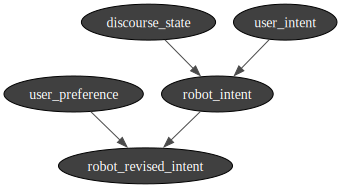

In [36]:
bn = gum.BayesNet('Robot intent')
user_intent = bn.add(gum.LabelizedVariable('user_intent', 'user_intent', ['info_r', 'opinion_expr']))
discourse_state = bn.add(gum.LabelizedVariable('discourse_state', 'discours_state', ['prev_topic', 'new_topic']))
robot_intent = bn.add(gum.LabelizedVariable('robot_intent', 'robot intent', ['acknowledge', 'provide_statement']))
robot_revised_intent = bn.add(gum.LabelizedVariable('robot_revised_intent', 'robot_revised_intent', ['acknowledge_short', 'acknowledge_long', 'provide_statement_short','provide_statement_long']))
user_preference = bn.add(gum.LabelizedVariable('user_preference', 'user preference', ['provide_statement_short','provide_statement_long']))
bn.addArc(user_intent,robot_intent)
bn.addArc(discourse_state, robot_intent)
bn.addArc(robot_intent, robot_revised_intent)
bn.addArc(user_preference, robot_revised_intent)
gnb.showBN(bn, size ='30')

In [25]:
bn.cpt(user_intent).fillWith([0.3,0.7])

(pyAgrum.Potential<double>@0x12be5d710) 
  user_intent      |
info_r   |opinion_e|
---------|---------|
 0.3000  | 0.7000  |

In [27]:
bn.cpt(discourse_state).fillWith([0.8,0.2])

(pyAgrum.Potential<double>@0x12be31960) 
  discourse_state  |
prev_topi|new_topic|
---------|---------|
 0.8000  | 0.2000  |

In [ ]:
bn.cpt(robot_intent)[{'user_intent':'info_r', 'discours_state':'long'}] = [0.1,0.9,0.0,0.0]


In [39]:
bn.cpt(robot_revised_intent)[{'robot_intent':'acknowledge', 'user_preference':'provide_statement_short'}] = [0.1,0.9,0.0,0.0]
bn.cpt(robot_revised_intent)[{'robot_intent':'acknowledge', 'user_preference':'provide_statement_long'}] = [0.0,0.0,0.9,0.1]
bn.cpt(robot_revised_intent)[{'robot_intent':'provide_statement', 'user_preference':'provide_statement_long'}] = [0.9,0.1,0.0,0.0]
bn.cpt(robot_revised_intent)[{'robot_intent':'provide_statement', 'user_preference':'provide_statement_short'}] = [0.0,0.0,0.1,0.9]
bn.cpt(robot_revised_intent)

(pyAgrum.Potential<double>@0x13c3a6970) 
             ||  robot_revised_intent                 |
robot_|user_p||acknowled|acknowled|provide_s|provide_s|
------|------||---------|---------|---------|---------|
acknow|provid|| 0.1000  | 0.9000  | 0.0000  | 0.0000  |
provid|provid|| 0.0000  | 0.0000  | 0.1000  | 0.9000  |
acknow|provid|| 0.0000  | 0.0000  | 0.9000  | 0.1000  |
provid|provid|| 0.9000  | 0.1000  | 0.0000  | 0.0000  |